In [1]:
import nn_training.optimizers as optim
import nn_training.experiment_objectives as object_fun
import nn_training.data_utils as utils
from math import pi
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
import random
random.seed(1)

%load_ext autoreload
%autoreload 2

In [2]:
def experiment(name, mutation, mutation_prime, func, dataset, input_size, hidden_size, iters, log_s = False):
    optimizer = optim.MuLambdaEvolutionStrategy(
        mu_value=25,
        lambda_value=100,
        optimized_func=func,
        dataset = dataset
    )
    experiment = optimizer.optimize(
        experiment_name = name,
        in_channels = input_size,
        n_hidden_neurons = hidden_size,
        out_channels = 1,
        n_iters=iters,
        best_loss_treshold=1e-3,
        probe_times=40,
        mutation_tau=mutation,
        mutation_tau_prime=mutation_prime,
    )

    with open(os.path.join("results/", experiment.name + ".pickle"), "wb") as file:
        pickle.dump(experiment, file)

    min_losses = [min(i) for i in experiment.losses_per_epoch]

    x = [ i for _, i in zip(range(1000), dataset)]
    y = [ optimizer.optimized_func(i) for i in x]
    y_predicted = [ experiment.best_individual.predict(i) for i in x]

    fig, ax = plt.subplots(1,2, figsize=(12, 5))
    ax[0].plot(range(len(experiment.losses_per_epoch)), min_losses)
    ax[0].set_title("Funkcja straty")
    ax[0].set_xlabel("Epoka / iteracja")
    ax[0].set_ylabel("Strata w skali log" if log_s else "Strata")
    ax[0].set_yscale(value='log' if log_s else 'linear')
    ax[1].scatter(x, y, color='red', label='Originalna funkcja')
    ax[1].scatter(x, y_predicted, color='blue', label='Aproksymowana funkcja')
    ax[1].legend()
    ax[1].set_xlabel("$x$")
    ax[1].set_ylabel("$Q(x)$")
    ax[1].set_title("Aproksymowana funkcja")
    plt.show()

## Polynomial

Epoch 1000 loss = 0.7303265260218399

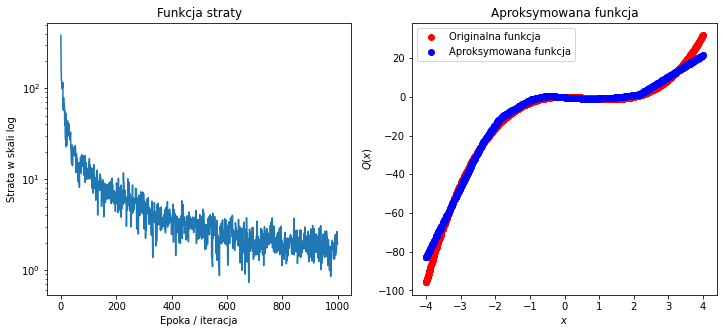

In [3]:
experiment(
    'MuLambda-Poly-0.1-0.2', 0.1, 0.2,
    object_fun.polynomial_func, utils.UniformDistribution(1, -4, 4), 
    1,
    30,
    1000,
    True
)

Epoch 1000 loss = 0.17939541301255155

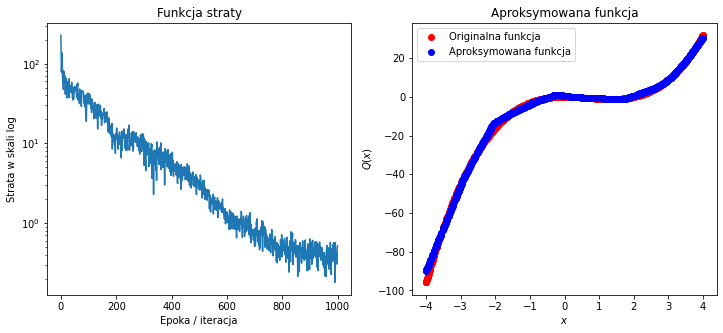

In [4]:
experiment(
    'MuLambda-Poly-0.5-0.6', 0.5, 0.6,
    object_fun.polynomial_func, utils.UniformDistribution(1, -4, 4), 
    1,
    30,
    1000,
    True
)

Epoch 1000 loss = 0.1934425177235142

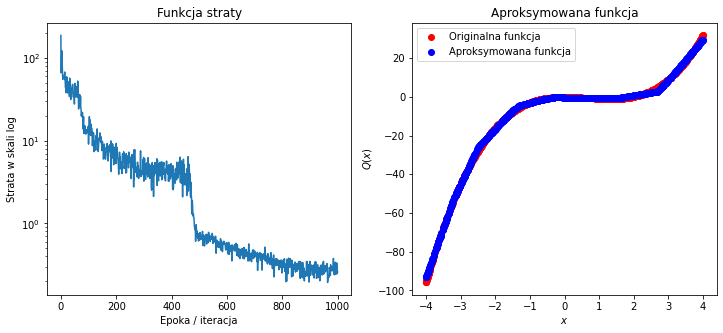

In [5]:
experiment(
    'MuLambda-Poly-0.9-1.0', 0.9, 1.0,
    object_fun.polynomial_func, utils.UniformDistribution(1, -4, 4), 
    1,
    30,
    1000,
    True
)

## SinCos

Epoch 1000 loss = 0.2149509764834952

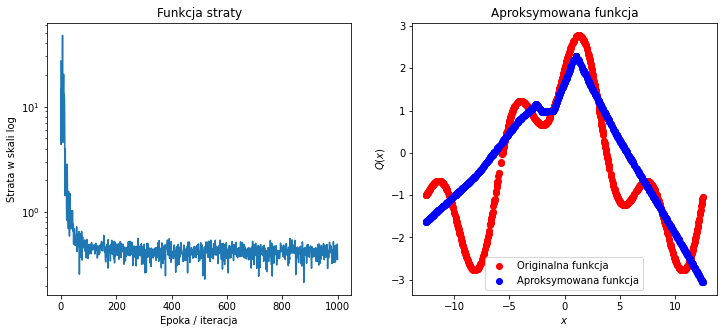

In [6]:
experiment(
    'MuLambda-SinCos-0.1-0.2', 0.1, 0.2,
    object_fun.sinusoidal, utils.UniformDistribution(1, -4 * pi, 4 * pi), 
    1,
    30,
    1000,
    True
)

Epoch 1000 loss = 0.18127630614506937

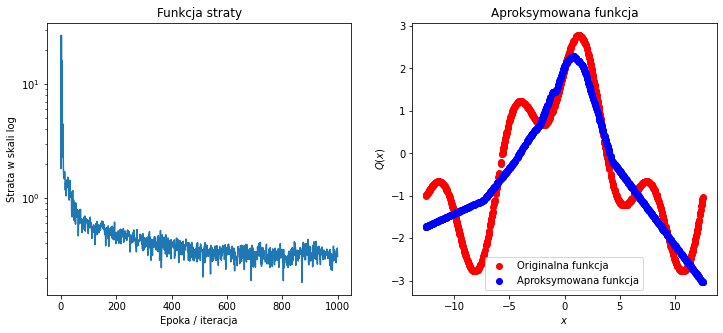

In [7]:
experiment(
    'MuLambda-SinCos-0.5-0.6', 0.5, 0.6,
    object_fun.sinusoidal, utils.UniformDistribution(1, -4 * pi, 4 * pi), 
    1,
    30,
    1000,
    True
)

Epoch 1000 loss = 0.14245560546263925

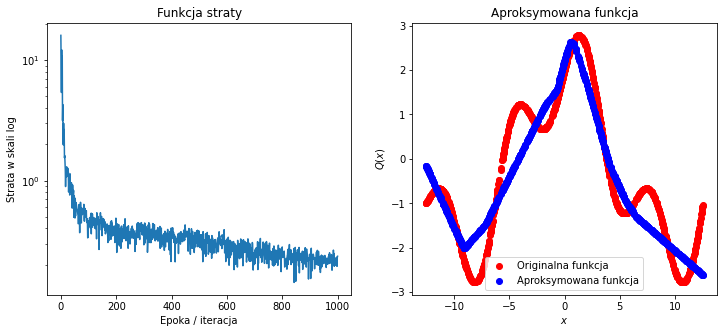

In [8]:
experiment(
    'MuLambda-SinCos-0.9-1.0', 0.9, 1.0,
    object_fun.sinusoidal, utils.UniformDistribution(1, -4 * pi, 4 * pi), 
    1,
    30,
    1000,
    True
)

Epoch 1000 loss = 0.2797044837227133

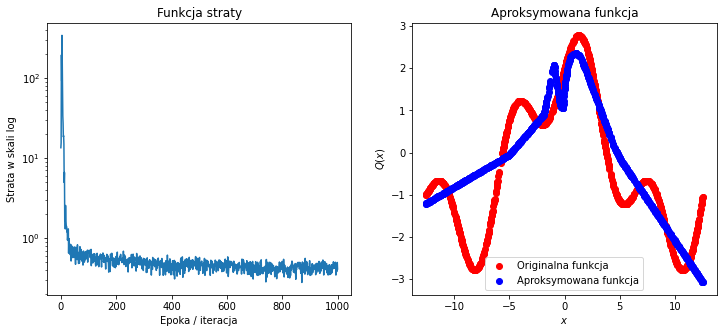

In [9]:
experiment(
    'MuLambda-SinCos-1.3-1.5', 1.3, 1.5,
    object_fun.sinusoidal, utils.UniformDistribution(1, -4 * pi, 4 * pi), 
    1,
    30,
    1000,
    True
)

## Xor

In [10]:
import seaborn as sns

def experiment(name, mutation, mutation_prime, func, dataset, input_size, hidden_size, iters, log_s = False):
    optimizer = optim.MuLambdaEvolutionStrategy(
        mu_value=25,
        lambda_value=100,
        optimized_func=func,
        dataset = dataset
    )
    experiment = optimizer.optimize(
        experiment_name = name,
        in_channels = input_size,
        n_hidden_neurons = hidden_size,
        out_channels = 1,
        n_iters=iters,
        best_loss_treshold=1e-3,
        probe_times=40,
        mutation_tau=mutation,
        mutation_tau_prime=mutation_prime,
    )

    with open(os.path.join("results/", experiment.name + ".pickle"), "wb") as file:
        pickle.dump(experiment, file)
    
    min_losses = [min(i) for i in experiment.losses_per_epoch]

    x = [ i for _, i in zip(range(1000), dataset)]
    y = [ optimizer.optimized_func(i) for i in x]
    y_predicted = [ experiment.best_individual.predict(i)[0] for i in x]
    
    fig, ax = plt.subplots(1,1, figsize=(7, 5))
    ax.plot(range(len(experiment.losses_per_epoch)), min_losses)
    ax.set_title("Funkcja straty")
    ax.set_xlabel("Epoka / iteracja")
    ax.set_ylabel("Strata w skali log" if log_s else "Strata")
    ax.set_yscale(value='log' if log_s else 'linear')
    plt.show()
    for x in [ (0, 0), (0, 1), (1, 0), (1, 1) ]:
        print(f"F{x} = {experiment.best_individual.predict(np.array(x))}")

Epoch 37 loss = 0.0015056085183787937

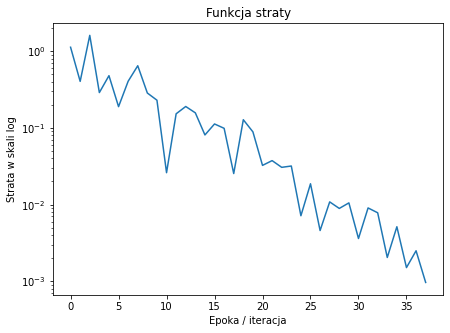

F(0, 0) = [0.01837764]
F(0, 1) = [0.95280978]
F(1, 0) = [0.98730747]
F(1, 1) = [0.02113261]


In [11]:
experiment(
    'MuLambda-Xor-0.1-0.2', 0.1, 0.2,
    object_fun.xor, utils.RandintGenerator(1), 
    2,
    30,
    1000,
    True
)

Epoch 39 loss = 0.002817037218514814

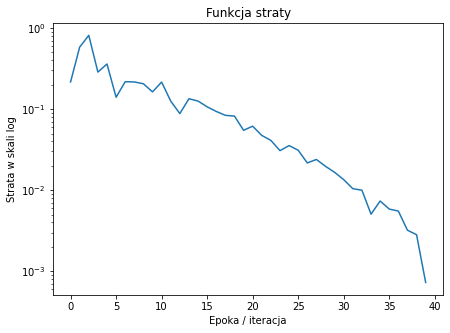

F(0, 0) = [0.01846118]
F(0, 1) = [0.96425473]
F(1, 0) = [0.98884802]
F(1, 1) = [0.03511868]


In [12]:
experiment(
    'MuLambda-Xor-0.5-0.6', 0.5, 0.6,
    object_fun.xor, utils.RandintGenerator(1), 
    2,
    30,
    1000,
    True
)

Epoch 50 loss = 0.0014467368048865542

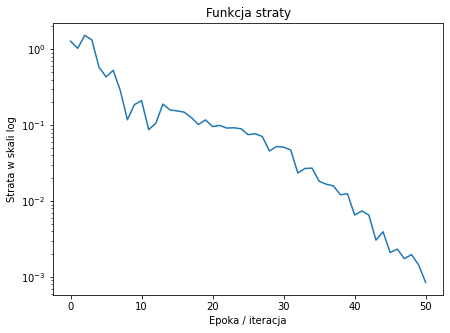

F(0, 0) = [4.14030453e-05]
F(0, 1) = [0.9753622]
F(1, 0) = [0.98282275]
F(1, 1) = [0.04766443]


In [13]:
experiment(
    'MuLambda-Xor-0.9-1.0', 0.9, 1.0,
    object_fun.xor, utils.RandintGenerator(1), 
    2,
    30,
    1000,
    True
)

Epoch 61 loss = 0.0010051038752801696

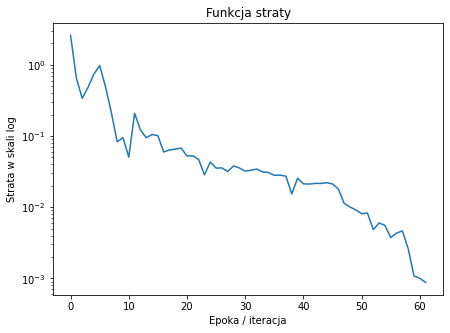

F(0, 0) = [0.01540872]
F(0, 1) = [0.96149602]
F(1, 0) = [0.97425552]
F(1, 1) = [0.04488484]


In [14]:
experiment(
    'MuLambda-Xor-1.3-1.5', 1.3, 1.5,
    object_fun.xor, utils.RandintGenerator(1), 
    2,
    30,
    1000,
    True
)